In [2]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
import numpy as np
from yellowbrick.classifier import classification_report
import matplotlib.pyplot as plt

/home/dyllanjr/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [3]:
%pwd

'/home/dyllanjr/Documents/Classification-M2/notebooks/model_building'

In [4]:
%cd '/home/dyllanjr/Documents/Classification-M2/data/processed/'

/home/dyllanjr/Documents/Classification-M2/data/processed


In [5]:
csh120 = pd.read_pickle('csh120.pkl')
csh120.head()

,lastSensorEventHours,lastSensorEventSeconds,lastSensorDayOfWeek,windowDuration,timeSinceLastSensorEvent,prevDominantSensor1,prevDominantSensor2,lastSensorID,lastSensorLocation,lastMotionLocation,...,sensorElTime-Chair,sensorElTime-DiningRoom,sensorElTime-Hall,sensorElTime-Ignore,sensorElTime-Kitchen,sensorElTime-LivingRoom,sensorElTime-Office,sensorElTime-OutsideDoor,sensorElTime-WorkArea,activity
0,1.0,4020.0,5.0,3766.0,1.0,0.0,0.0,1.0,1.0,1.0,...,86400.0,86400.0,86400.0,86400.0,86400.0,86400.0,86400.0,86400.0,86400.0,Sleep
1,1.0,4703.0,5.0,4448.0,683.0,0.0,0.0,1.0,1.0,1.0,...,86400.0,86400.0,86400.0,86400.0,86400.0,86400.0,86400.0,86400.0,86400.0,Sleep
2,1.0,4704.0,5.0,4448.0,1.0,0.0,0.0,1.0,1.0,1.0,...,86400.0,86400.0,86400.0,86400.0,86400.0,86400.0,86400.0,86400.0,86400.0,Sleep
3,1.0,4705.0,5.0,4448.0,1.0,0.0,0.0,1.0,1.0,1.0,...,86400.0,86400.0,86400.0,86400.0,86400.0,86400.0,86400.0,86400.0,86400.0,Sleep
4,1.0,4706.0,5.0,3817.0,1.0,0.0,0.0,1.0,1.0,1.0,...,86400.0,86400.0,86400.0,86400.0,86400.0,86400.0,86400.0,86400.0,86400.0,Sleep


In [5]:
csh120.activity.value_counts()

Other_Activity           76060
Entertain_Guests         45778
Watch_TV                 30420
Dress                    23157
Personal_Hygiene         22451
Work_At_Table            14070
Sleep                    11437
Work_On_Computer         10750
Toilet                   10112
Wash_Dishes               4647
Bed_Toilet_Transition     4503
Take_Medicine             4370
Cook_Dinner               3816
Relax                     3640
Read                      3327
Leave_Home                3199
Groom                     2992
Cook                      2963
Cook_Breakfast            2652
Enter_Home                2631
Cook_Lunch                2305
Morning_Meds              1857
Evening_Meds              1814
Sleep_Out_Of_Bed          1230
Wash_Breakfast_Dishes     1218
Drink                      987
Eat_Lunch                  587
Step_Out                   572
Eat_Breakfast              478
Bathe                      439
Eat                        429
Eat_Dinner                 384
Wash_Lun

In [6]:
# simplified_target = {'other_activity': ['Other_Activity'], 'Entertainment': ['Entertain_Guests', 'Watch_TV'], 'Cook'}

In [8]:
X, y = csh120.drop('activity', axis=1), csh120.activity
X_val, X_test, y_val, y_test = train_test_split(X, y)

In [9]:
print(y_val.unique())

['Other_Activity' 'Personal_Hygiene' 'Dress' 'Bed_Toilet_Transition'
 'Toilet' 'Cook_Breakfast' 'Watch_TV' 'Sleep' 'Entertain_Guests' 'Cook'
 'Leave_Home' 'Work_At_Table' 'Cook_Dinner' 'Wash_Dishes' 'Morning_Meds'
 'Enter_Home' 'Work_On_Computer' 'Take_Medicine' 'Read' 'Groom'
 'Cook_Lunch' 'Relax' 'Eat_Breakfast' 'Wash_Breakfast_Dishes'
 'Sleep_Out_Of_Bed' 'Eat_Lunch' 'Step_Out' 'Wash_Lunch_Dishes' 'Drink'
 'Evening_Meds' 'Bathe' 'Phone' 'Wash_Dinner_Dishes' 'Eat' 'Eat_Dinner']


In [15]:
def make_sample(X_val, y_val, n_samples):
    '''Samples from validation set and Returns sampled X,y'''
    val_sample = X_val.join(y_val)
    val_sample = val_sample.sample(n=n_samples)
    return val_sample.drop('activity', axis=1), val_sample.activity

I might do some manipulation/grouping of the columns into similar categories for the sake of better model performance, This is a ton of possible classifications! Plus, there's a large amount of class imbalance.

In [25]:
X_samp, y_samp = make_sample(X_val, y_val, n_samples=50000)

In [26]:
logreg = LogisticRegression()
# params = {'penalty': ['l1', 'l2', 'elasticnet'], 'C': np.linspace(.0001,100, 5)}
# grid = GridSearchCV(logreg, param_grid=params, error_score=0)


/home/dyllanjr/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

/home/dyllanjr/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '
/home/dyllanjr/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


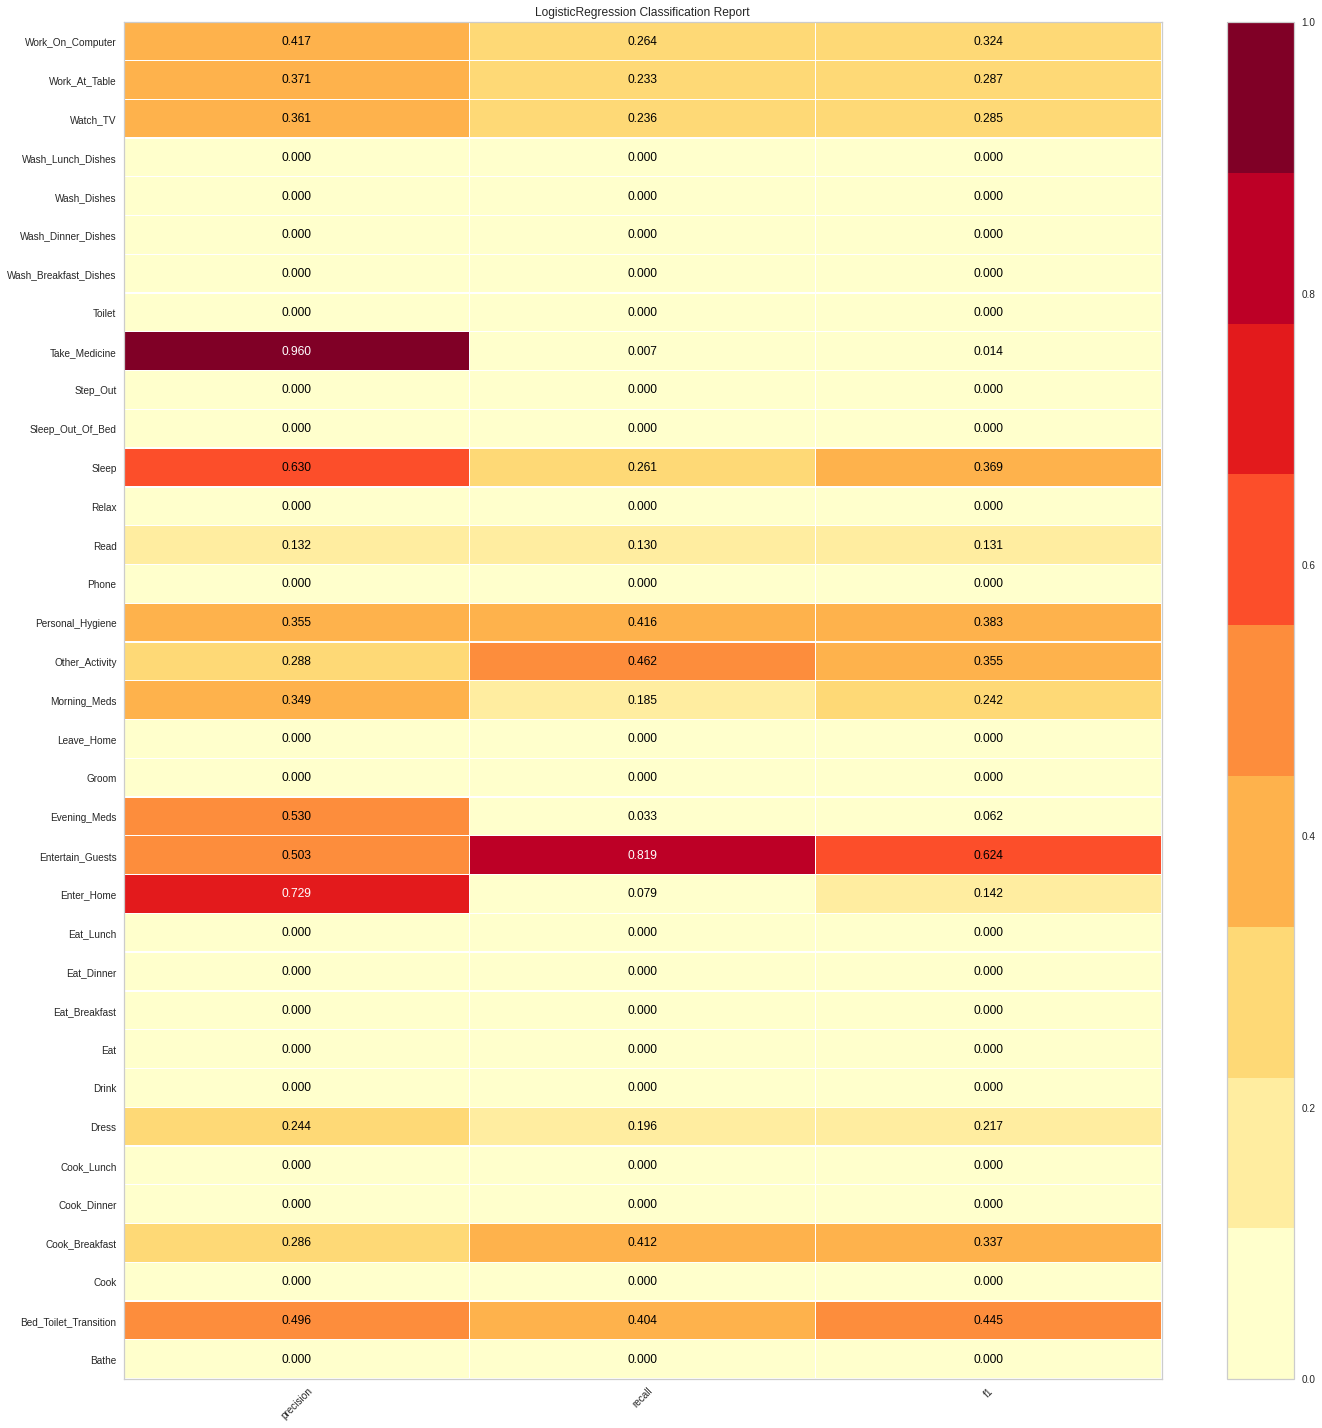

In [48]:
plt.figure(figsize=(20,20))
val_report = classification_report(logreg, X_val, y_val);


I'm sampling because the model takes a large amount of time to train on the whole dataset. The problem now is that the samples don't contain some of the classes, the F1 scores are ill defined. I could look into oversampling/undersampling, or I could look into bootstrapping. First I'll try bootstrapping before modifying my validation data too much.

In [67]:
coefs = logreg.coef_
inter = logreg.intercept_

In [36]:
y_val.unique().shape

(35,)

In [59]:
X_val.shape

(222116, 36)

In [78]:
def bootstrap_logreg(X_val, y_val, n_samples, n_straps):
    coefs = []
    intercepts = []
    for strap in range(n_straps):
        X_samp, y_samp = make_sample(X_val, y_val, n_samples)
        lr = LogisticRegression()
        lr.fit(X_samp, y_samp)
        coefs.append(lr.coef_)
        intercepts.append(lr.intercept_)
    return coefs, intercepts

In [81]:
coefs, intercepts = bootstrap_logreg(X_val, y_val, n_samples=50000, n_straps=3)

/home/dyllanjr/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/dyllanjr/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linea

I think my problem is that logistic regression just isn't going to cut it for this type of problem.

In [84]:
import seaborn as sns

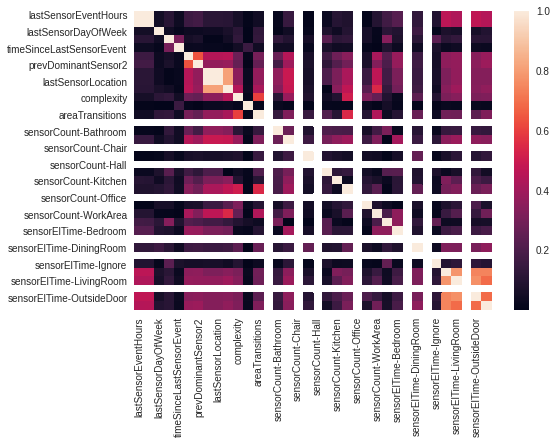

In [87]:
corrs = abs(X_val.corr())
sns.heatmap(corrs)

There's some strong multicolinearity between some of the features, lets try a baseline that doesn't make so many assumptions. 

In [88]:
from sklearn.tree import DecisionTreeClassifier

In [101]:
dt = DecisionTreeClassifier(class_weight='balanced')
X_val_train, X_val_test, y_val_train, y_val_test = train_test_split(X_val, y_val)

In [102]:
dt.fit(X_val_train, y_val_train)

DecisionTreeClassifier(class_weight='balanced')

/home/dyllanjr/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


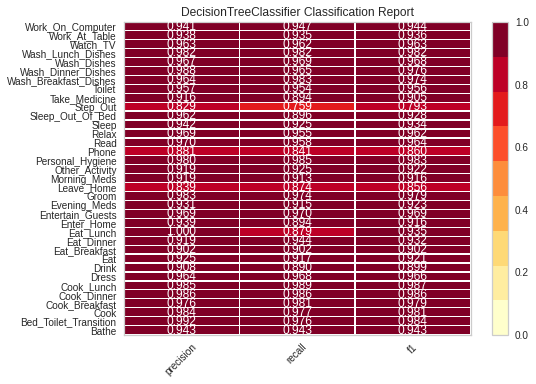

In [125]:
single_decision_tree = classification_report(dt, X_val_train, y_val_train, X_test, y_test)

In [104]:
dt.score(X_val_test, y_val_test)

0.9503322588197158

In [105]:
dt.score(X_val_train, y_val_train)

1.0

What's going on... why is my baseline so fantastic?

In [106]:
dt.score(X_test, y_test)

0.9492294601493807

In [108]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier()
forest.fit(X_val_train, y_val_train)

RandomForestClassifier()

/home/dyllanjr/anaconda3/envs/metis/lib/python3.8/site-packages/sklearn/base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


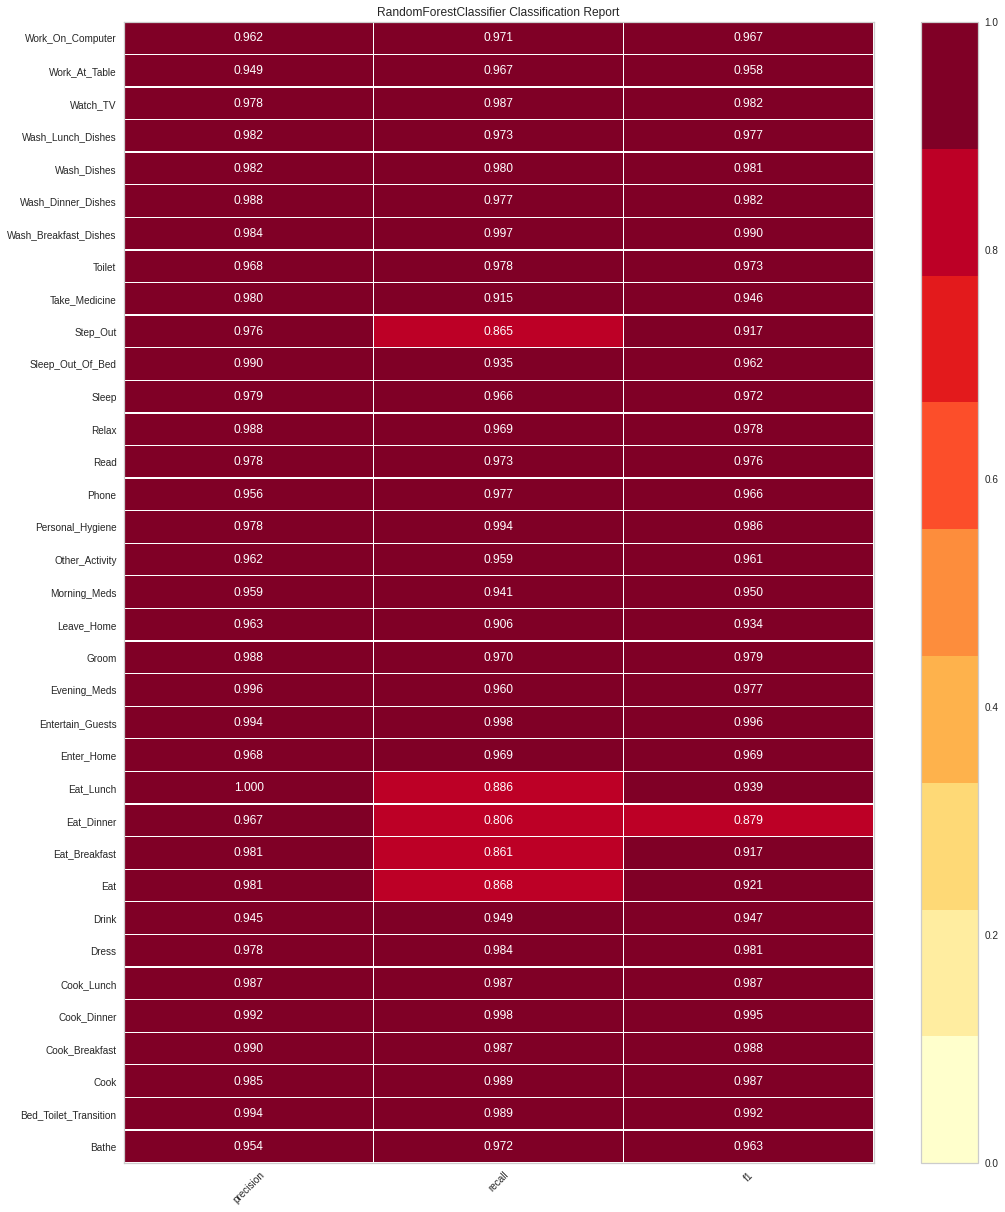

In [126]:
plt.figure(figsize=(15,17))
random_forest = classification_report(forest, X_val_train, y_val_train, X_test, y_test)

In [112]:
forest.score(X_val_train, y_val_train)

0.9999879942612568

In [113]:
forest.score(X_val_test, y_val_test)

0.9739955698824038

In [114]:
forest.score(X_test, y_test)

0.9747295344345548

In [135]:
pd.set_option('display.max_columns', 500)

In [136]:
csh120.head()

,lastSensorEventHours,lastSensorEventSeconds,lastSensorDayOfWeek,windowDuration,timeSinceLastSensorEvent,prevDominantSensor1,prevDominantSensor2,lastSensorID,lastSensorLocation,lastMotionLocation,complexity,activityChange,areaTransitions,numDistinctSensors,sensorCount-Bathroom,sensorCount-Bedroom,sensorCount-Chair,sensorCount-DiningRoom,sensorCount-Hall,sensorCount-Ignore,sensorCount-Kitchen,sensorCount-LivingRoom,sensorCount-Office,sensorCount-OutsideDoor,sensorCount-WorkArea,sensorElTime-Bathroom,sensorElTime-Bedroom,sensorElTime-Chair,sensorElTime-DiningRoom,sensorElTime-Hall,sensorElTime-Ignore,sensorElTime-Kitchen,sensorElTime-LivingRoom,sensorElTime-Office,sensorElTime-OutsideDoor,sensorElTime-WorkArea,activity
0,1.0,4020.0,5.0,3766.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.679501,0.0,0.0,0.0,34.35,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,86400.0,0.0,86400.0,86400.0,86400.0,86400.0,86400.0,86400.0,86400.0,86400.0,86400.0,Sleep
1,1.0,4703.0,5.0,4448.0,683.0,0.0,0.0,1.0,1.0,1.0,0.0,0.575315,0.0,0.0,0.0,34.35,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,86400.0,0.0,86400.0,86400.0,86400.0,86400.0,86400.0,86400.0,86400.0,86400.0,86400.0,Sleep
2,1.0,4704.0,5.0,4448.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.575315,0.0,0.0,0.0,34.35,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,86400.0,0.0,86400.0,86400.0,86400.0,86400.0,86400.0,86400.0,86400.0,86400.0,86400.0,Sleep
3,1.0,4705.0,5.0,4448.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.624775,0.0,0.0,0.0,34.35,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,86400.0,0.0,86400.0,86400.0,86400.0,86400.0,86400.0,86400.0,86400.0,86400.0,86400.0,Sleep
4,1.0,4706.0,5.0,3817.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.562746,0.0,0.0,0.0,34.35,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,86400.0,0.0,86400.0,86400.0,86400.0,86400.0,86400.0,86400.0,86400.0,86400.0,86400.0,Sleep


In [1]:
from joblib import dump, load

In [144]:
dump(forest, 'random_forest_baseline.joblib')

['random_forest_baseline.joblib']

In [142]:
%pwd

'/home/dyllanjr/Documents/Classification-M2/data/processed'

In [143]:
%cd /home/dyllanjr/Documents/Classification-M2/models

/home/dyllanjr/Documents/Classification-M2/models
